   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
3       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   
4      11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name   Segment        Country             City  ... Postal Code  \
0      Claire Gute  Consumer  United States        Henderson  ...       42420   
1      Claire Gute  Consumer  United States        Henderson  ...       42420   
2   Sean O'Donnell  Consumer  United States  Fort Lauderdale  ...       33311   
3  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   
4  Brosina Hoffman  Consumer  United States      Los Angeles  ...       90032   

   Region       Product ID   Category 

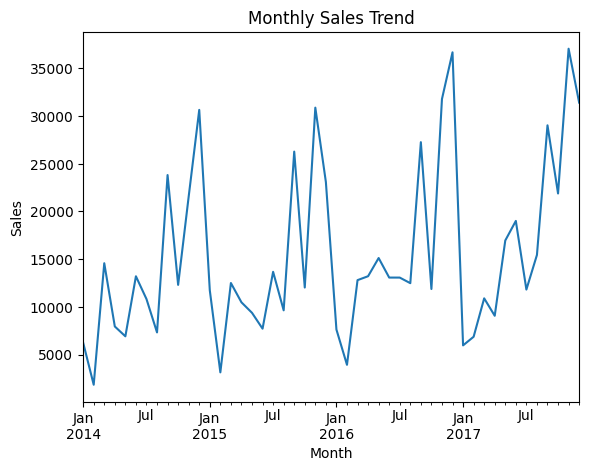

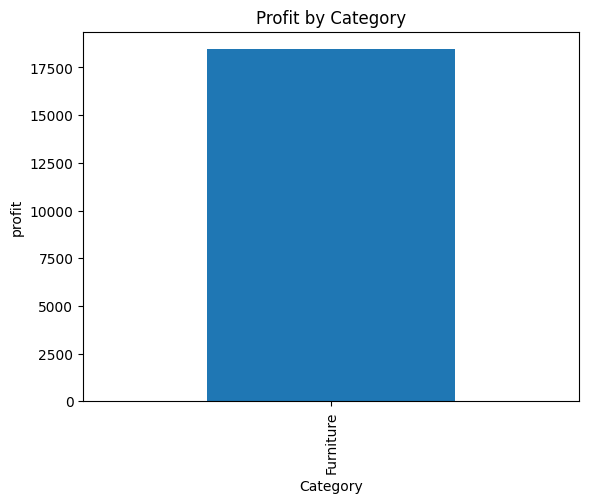

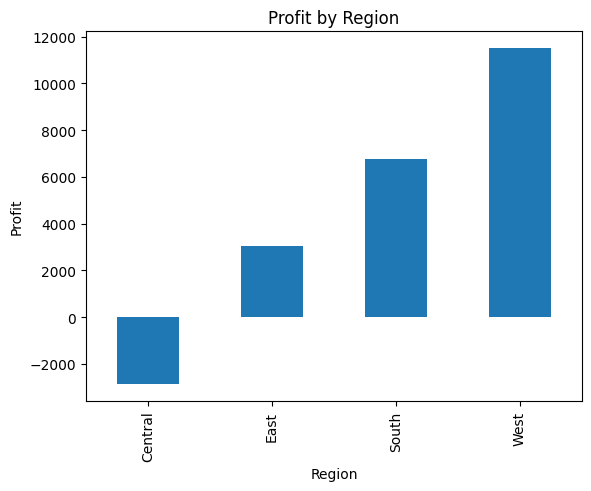

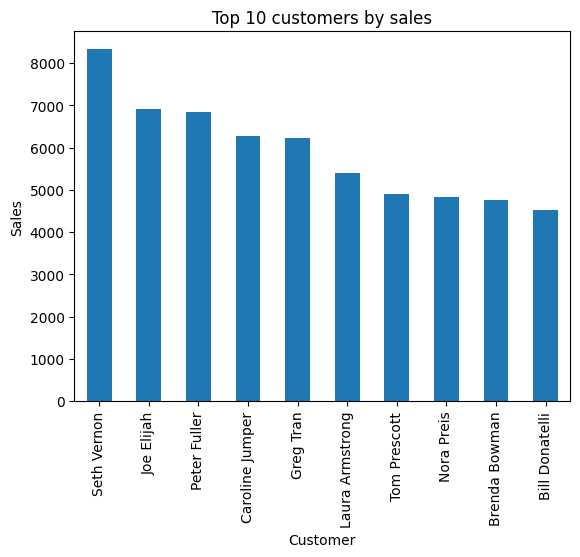

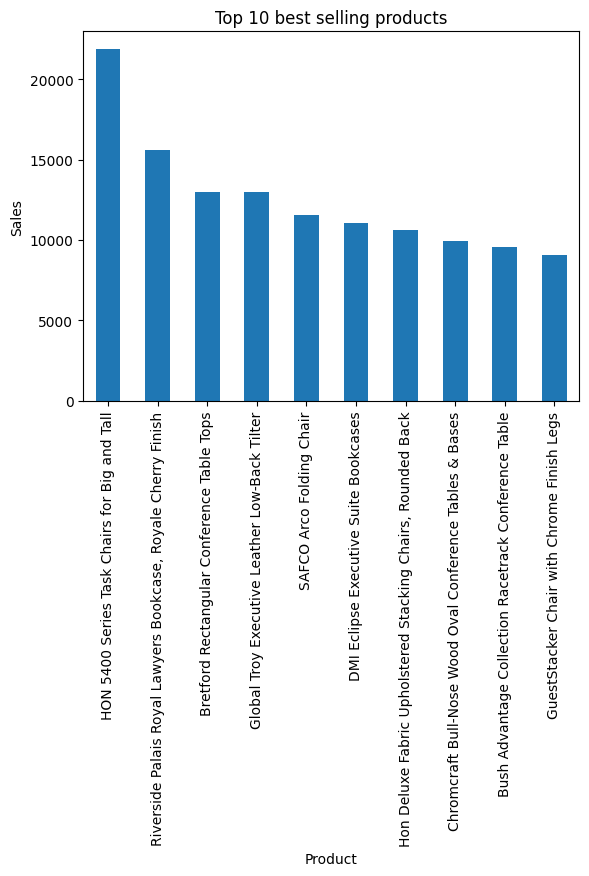

C:\Users\nitee\AppData\Local\Temp\ipykernel_23344\2784553490.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Customer Segment')['Sales'].sum().plot(kind='pie', autopct= '%1.1f%%', title='Sales by Customer Segment')


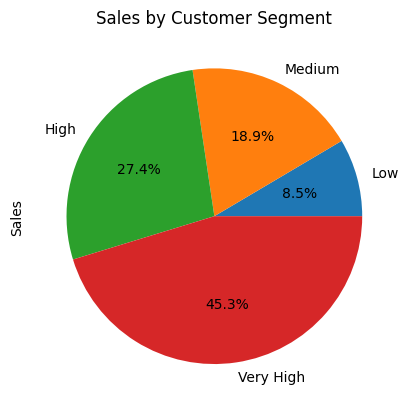

Total Sales: 741999.7953
Average Order Value: 349.8348869872702
Profit Margin: 0.024866951334588844
Average Customer Lifetime Value: 26.0979813295615


In [1]:
import pandas as pd
from openpyxl import workbook
df = pd.read_excel(r"C:\Users\nitee\Downloads\SuperstoreData (1).xlsx", engine= 'openpyxl')

print(df.head())

print(df.columns) 
print(df.describe())
print(df.isnull().sum())

#handling missing values if any
df= df.dropna() 

#convert 'order date' and ship date' to detetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

#create new features 
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Profit Margin'] = df['Profit']/ df['Sales']

#verify changes
print(df.head()) 

#sales and profit analysis 
import matplotlib.pyplot as plt
#sales trends over time 
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(kind='line',title='Monthly Sales Trend',xlabel='Month',ylabel='Sales')
plt.show()

#Profit analysis by category
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar',title='Profit by Category',xlabel='Category',ylabel='profit')
plt.show() 

#Profit analysis by region
region_profit = df.groupby('Region')['Profit'].sum()
region_profit.plot(kind='bar',title='Profit by Region',xlabel = 'Region',ylabel = 'Profit')
plt.show() 

#customer and product insights
#Top customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar',title='Top 10 customers by sales',xlabel='Customer',ylabel='Sales')
plt.show()

#Best-selling products
best_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
best_selling_products.plot(kind='bar',title='Top 10 best selling products',xlabel='Product',ylabel='Sales')
plt.show()

#Customer segmentation (example: by total sales)

df['Customer Segment'] = pd.qcut(df.groupby('Customer ID')['Sales'].transform('sum'), 4, labels=['Low', 'Medium', 'High', 'Very High']) 
df.groupby('Customer Segment')['Sales'].sum().plot(kind='pie', autopct= '%1.1f%%', title='Sales by Customer Segment')
plt.show()

# Calculate KPIs

total_sales = df['Sales'].sum()
average_order_value = df['Sales'].mean() 
profit_margin = df['Profit'].sum() /df['Sales'].sum()

print(f"Total Sales: {total_sales}")
print(f"Average Order Value: {average_order_value}")
print(f"Profit Margin: {profit_margin}")

# Customer Lifetime Value (CLV) estimate (simplified)

clv = df.groupby('Customer ID') ['Profit'].sum().mean()
print(f"Average Customer Lifetime Value: {clv}")